Her biri çeşitli özellikler ve bir etiket şeklinde bilgi içeren m eğitim örneğinden oluşan bir veri seti var. Her etiket, eğitim örneğinin ait olduğu bir sınıfa karşılık gelir. Çok sınıflı sınıflandırmada, sonlu bir sınıf kümesi vardır. Her eğitim örneğinin ayrıca n özelliği vardır.

Örneğin, farklı meyve türlerinin tanımlanması durumunda “Şekil”, “Renk”, “Yarıçap” öne çıkarılabilir ve “Elma”, “Portakal”, “Muz” farklı sınıf etiketleri olabilir. 

Çok sınıflı bir sınıflandırmada, eğitim verilerimizi kullanarak bir sınıflandırıcı eğitiriz ve bu sınıflandırıcıyı yeni örnekleri sınıflandırmak için kullanırız. 

1. Veri kümesi yüklenir ve tanımlanır 
2. Veri kümesini "eğitim" ve "test" verilerine bölünür
3. Eğitim verileri üzerinde Karar ağacı, SVM ve KNN sınıflandırıcılarını eğitilir.
4. Test verileri için etiketleri tahmin etmek için yukarıdaki sınıflandırıcıları kullanılır.
5. Doğruluk çlçülür  ve sınıflandırma görselleştirilir.

##Karar Ağacı Sınıflandırıcı
Karar ağacı sınıflandırıcı, çok sınıflı sınıflandırma için sistematik bir yaklaşımdır.

Veri kümesine bir dizi soru sorar (öznitelikleri/özellikleri ile ilgili). 

Karar ağacı sınıflandırma algoritması bir ikili ağaç üzerinde görselleştirilebilir.

Kökte ve dahili düğümlerin her birinde bir soru sorulur ve bu düğümdeki veriler ayrıca farklı özelliklere sahip ayrı kayıtlara bölünür. Ağacın yaprakları, veri kümesinin bölündüğü sınıfları ifade eder

In [7]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [35]:
from sklearn.tree import DecisionTreeClassifier
kam_model = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
kam_predictions = kam_model.predict(X_test)

In [36]:
doğruluk = kam_model.score(X_test,y_test)
print(doğruluk)

0.8947368421052632


In [25]:
th = confusion_matrix(y_test,kam_predictions)
print(th)

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


##SVM (Destek vektör makinesi) Sınıflandırıcı 
SVM (Destek vektör makinesi), özellik vektörü yüksek boyutlu olduğunda verimli bir sınıflandırma yöntemidir. 
Sci-kit öğrenmede, çekirdek fonksiyonunu belirtebiliriz.

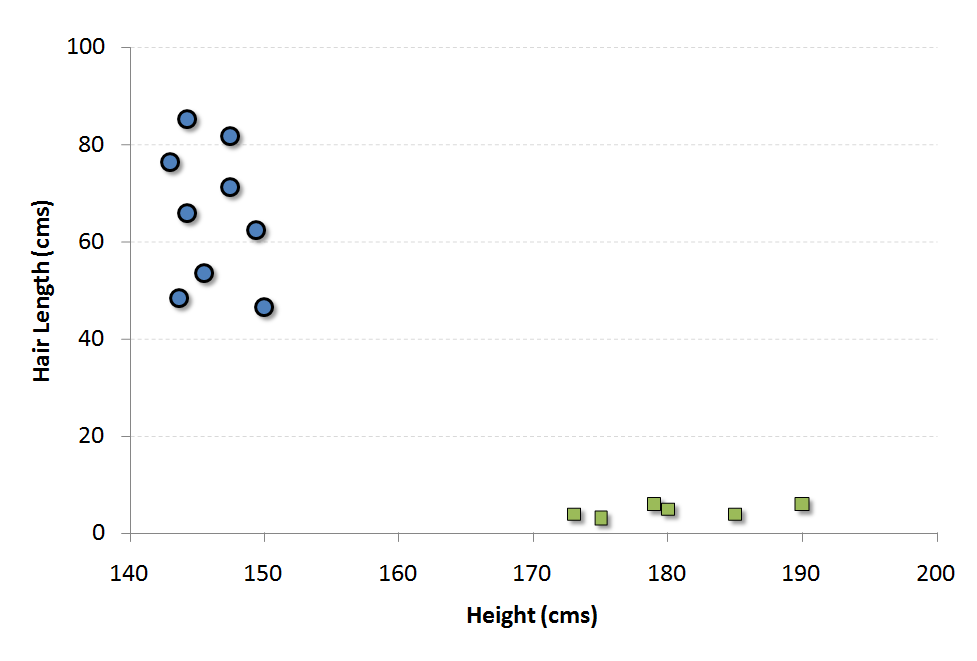

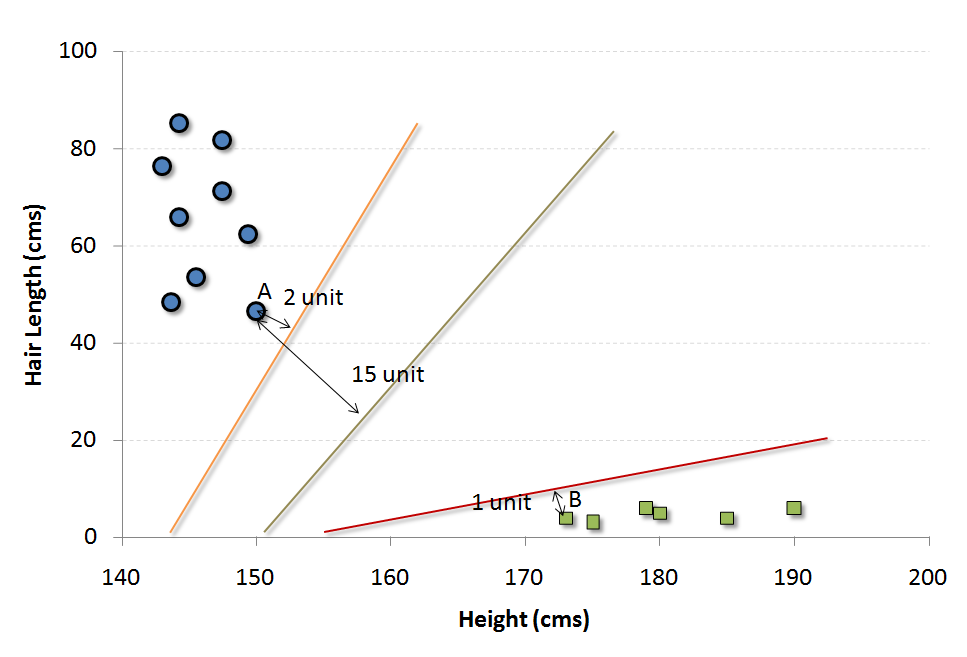

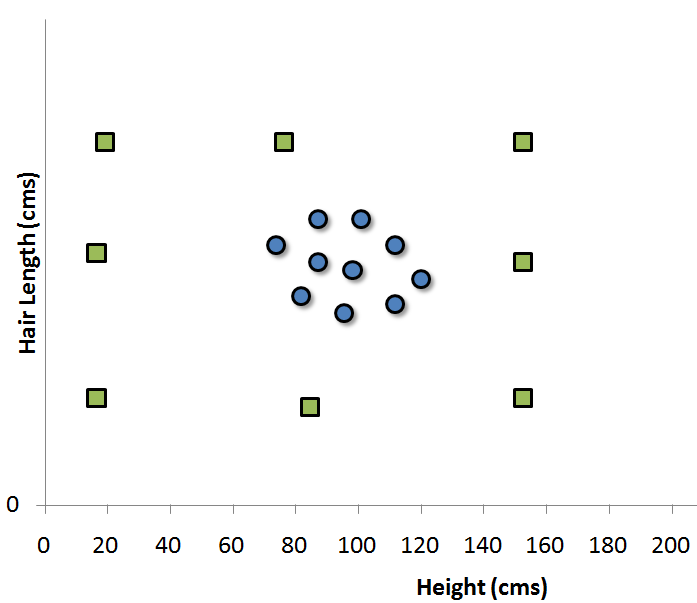

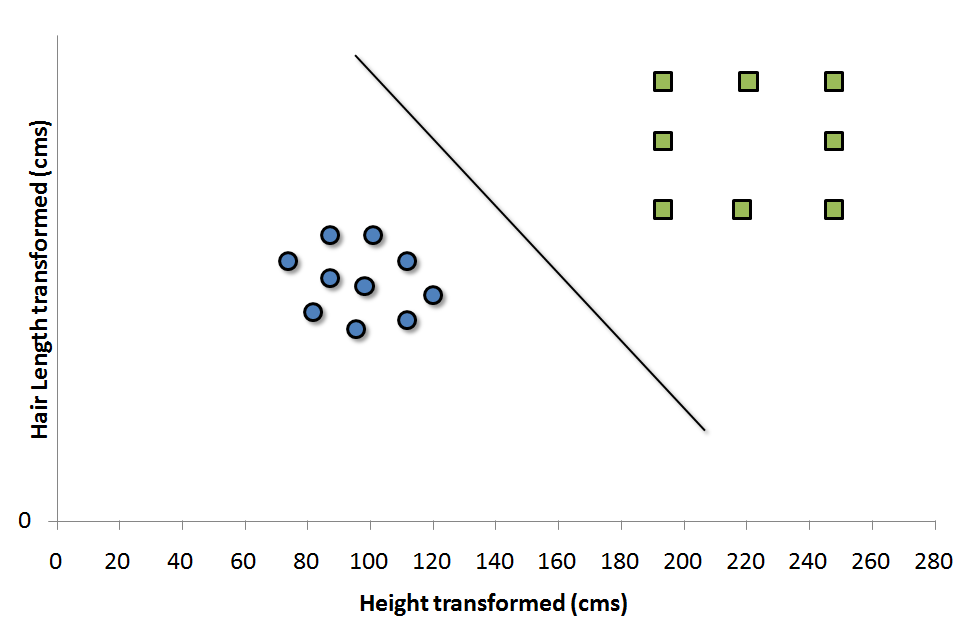

In [18]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
iris = datasets.load_iris()

In [ ]:
x = iris.data
y = iris.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [22]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train,y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [38]:
doğruluk = svm_model_linear.score(X_test,y_test)
print(doğruluk)

0.9736842105263158


In [24]:
th = confusion_matrix(y_test,svm_predictions)

print(th)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


##KNN (k-en yakın komşular) sınıflandırıcı
KNN veya k-en yakın komşular, en basit sınıflandırma algoritmasıdır. Bu sınıflandırma algoritması, verilerin yapısına bağlı değildir. 

Yeni bir örnekle karşılaşıldığında, eğitim verilerinden en yakın k komşusu incelenir. 

İki örnek arasındaki uzaklık, öznitelik vektörleri arasındaki öklid uzaklığı olabilir. Karşılaşılan örnek için en yakın k komşu arasında çoğunluk sınıfı alınır. 

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors= 7).fit(X_train,y_train)


In [27]:
doğruluk = knn.score(X_test,y_test)
print(doğruluk)

0.9736842105263158


In [29]:
knn_predictions = knn.predict(X_test)
th = confusion_matrix(y_test,knn_predictions)
print(th)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


##Bayes Sınıflandırıcı
Naive Bayes sınıflandırma yöntemi Bayes teoremine dayanmaktadır. 

Verilerdeki her bir özellik çifti arasında bağımsız olduğunu varsaydığı için 'Naif' olarak adlandırılır. 

(x 1 , x 2 , …, x n ) bir özellik vektörü ve y de bu özellik vektörüne karşılık gelen sınıf etiketi olsun .

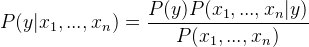

x 1 , x 2 , …, x n birbirinden bağımsız olduğundan,  

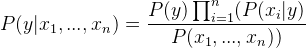

P(x 1 , …, x n ) (sabit olduğundan)  kaldırılarak orantılılık ekleme .

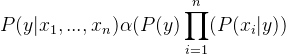

Bu nedenle, sınıf etiketine şu şekilde karar verilir: 

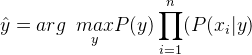

P(y) , eğitim veri setindeki y sınıf etiketinin göreli frekansıdır .
Gauss Naive Bayes sınıflandırıcısı durumunda, P(x i | y) şu şekilde hesaplanır:

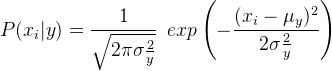

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [30]:
from sklearn.naive_bayes import GaussianNB

bys = GaussianNB().fit(X_train,y_train)
bys_predictions = gnb.predict(X_test)

In [31]:
doğruluk = bys.score(X_test,y_test)
print(doğruluk)

1.0


In [33]:
th = confusion_matrix(y_test,bys_predictions)
print(th)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
